<font color=blue> Привет еще раз. Спасибо, что доделал работу. Мои комментарии на этот раз выделены синим цветом.
    
---

---
## Комментарий от наставника

Привет! Спасибо, что прислал задание:) В целом, работа производит неплохое впечатление, однако обрати внимание на некоторые мои комментарии. Они обозначены пометкой **Комментарий от наставника**. Пострайся учесть эти комментарии.

---

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

---
## Комментарий от наставника


Правильно, что есть краткое вступление в работу, описание того, что надо делать. В работе необходимо приводить краткий план того, что надо сделать(если этот план имеется). Также название работы лучше отображать в отдельной ячейке и делать крупный шрифт (заголовок). Так работа выглядит презентабельно.
    
---

#### Привет, можешь, пожалуйста, привести пример, как должно выглядеть вступление в работу? Я правда не совсем понимаю, что в нем нужно указывать. Краткий план работы у меня приведен в выводе после первого шага. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import matplotlib.pyplot as plt #импортируем библиотику matplotlib для дальнейшей работы с графиками
import pandas as pd #импортируем библиотеку pandas

In [2]:
blocks = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') #создаем переменную для нашей таблицу и указываем разделитель колонок
pd.set_option('display.max_columns', None) #снимаем ограничение на количество отображаемых столбцов

In [3]:
blocks.info() #получаем основные сведения о датафрейме(наименование колонок, количество элементов, столбцов, тип данных)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [4]:
blocks.head(25) #выведем первые 25 строчек таблицы, чтобы получить визуальное представление о данных

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [5]:
#здесь проверим фрейм на количество уникальных значений во всех столбцах, чтобы в дальнейшем было удобнее работать с ними
#blocks['total_images'].value_counts() - нет пропущенных значений, но есть непопулярные значения (с 21)
#blocks['last_price'].value_counts() - дробные значения
#blocks['total_area'].value_counts() - все хорошо
#blocks['first_day_exposition'].value_counts() - все хорошо
#blocks['rooms'].value_counts() - артефактные значения
#blocks['ceiling_height'].value_counts() - пропущенные и артефактные значения
#blocks['floors_total'].value_counts() - артефактные значения
#blocks['living_area'].value_counts() - пропущенные и дробные значения
#blocks['floor'].value_counts() - есть непопулярные значения
#blocks['floors_total'].value_counts - артефактные значения
#blocks['is_apartment'].value_counts() - все хорошо
#blocks['studio'].value_counts() - все хорошо
#blocks['open_plan'].value_counts() - все хорошо
#blocks['kitchen_area'].value_counts() - пропущенные значения
#blocks['balcony'].value_counts() - пропущенные значения
#blocks['locality_name'].value_counts() - одна и та же локация записана разными словами 
#blocks['airports_nearest'].value_counts() - пропущенные значения
#blocks['cityCenters_nearest'].value_counts() - пропущенные значения
#blocks['parks_around3000'].value_counts() - пропущенные значения
#blocks['parks_nearest'].value_counts() - пропущенные и артефактные значения
#blocks['ponds_around3000'].value_counts() - пропущенные значения
#blocks['ponds_nearest'].value_counts() - пропущенные и артефактные значения
#blocks['days_exposition'].value_counts() - пропущенные, артефактные и некорректные значения

### Вывод

Сначала я импортировал библиотеку Pandas и поместил таблицу в переменную blocks. При первой попытке вывести таблицу я столкнулся с проблемой склеивания наименовай столбцов в одну сплошную строчку. Чтобы решить это проблему, я указал '\t' в качестве разделителя колонок.

В таблице 23699 элементов, 22 столбца и четыре типа данных: (bool, object, int64, float64).

Ниже приведены наименования всех столбцов, их содержимое, а также замеченные мною проблемы при их подробном анализе:

'total_images' - количество фотографий в объявлении - редкие и выбивающиеся значения;
'last_price' - цена на момент снятия объявления с публикации - дробные значения;
'total_area' - площадь квартиры в квадратных метрах - все хорошо
'first_day_exposition' - дата публикации - все хорошо;
'rooms' - количество комнат - артефактные значения;
'ceiling_height' - высота потолков - пропущенные и выбивающиеся значения;
'floor' - этаж, на котором расположена квартира - выбивающиеся значения;
'floors_total' - количество этажей в доме - выбивающиеся значения;
'living_area' - жилая площадь в квадратных метрах - все хорошо;
'floor' - этаж квартиры - есть выбивающиеся значения;
'is_apartment' - апартаменты - все хорошо;
'studio' - студия - все хорошо;
'open_plan' - сводобная планировка - все хорошо;
'kitchen_area' - площадь кухни в квадратных метрах - пропущенные значения;
'balcony' - число балконов - пропущенные значения;
'locality_name' - название населенного пункта - не совсем понимаю, зачем данные сёл, посёлков и деревень;
'airports_nearest' - расстояние до ближайшего аэропорта в метрах - пропущенные значения;
'cityCentres_nearest' - расстояние до центра города в метрах - одинаковые наименования поселений записаны разными словами;
'parks_around3000' - количество парков в радиусе 3км - пропущенные значения;
'parks_nearest' - расстояние до ближайшего парка - пропущенные и выбивающиеся значения;
'ponds_around3000' - число водоемов в радиусе 3км - пропущенные значения;
'ponds_nearest' - расстояние до ближайшего водоема - пропущенные и выбивающиеся значения;
'days_exposition' - сколько дней было размещено объявление - пропущенные, выбивающиеся и дробные значения.

##### Предположения о появлении пропусков:
1. Пропуски в столбце 'ceiling_height' могут быть связаны с тем, что 
2. Пропуски в столбце 'balcony' связаны с тем, что в квартире действительно отсутствует балкон и при заполнении объявления человек просто пропустил эту строчку. То же самое верно и в отношении нулевых значений столбца;
3. Пропуски в столбце 'kitchen_area' появились из-за того, что некоторые квартиры представляют из себя студии, а применительно к ним нет такого понятия "площадь кухни", т.к в них одна общая площадь для всего. Также они могут быть связаны с пропусками значений площади в других столбцах, например, 'living_area'. 
4. Пропуски в столбцах 'airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest' связаны с тем, что поблизости от тех населенных пунктов, где недоступны эти значения, просто нет ни парков, ни водоемов, а расстояние до центра настолько велико, что не имеет значения, указано оно или нет. Как мы знаем, эти значения заполнялись автоматически.
5. Пропуски в столбцах 'pounds_around3000' и 'parks_around3000' информируют нас о том, что в радиусе 3км от локации нет ни водоемов, ни парков. 
6. Пропуски в столбце 'days_exposition' связаны с тем, что объявление все еще находится на публикации.

##### Предложения по заполнению пропусков:
1. Пропущенные значения в столбцах 'ceiling_height', 'kitchen_area, 'living_area' можно будет заменить медианой в соответсвтии с количеством комнат в каждой квартире;
2. Пропуски в 'столбце' balcony можно заменить '0', т.к пропущенные значения в столбце означают, что балкона нет в квартире;
3. Пропуски в столбцах 'airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest' можно заменить специальным маркером, а потом отсеивать их при расчетах;
4. Пропуски в столбцах 'pounds_around3000' и 'parks_around3000'можно заменить нулевым значением;
5. Пропуски в столбце 'days_exposition' можно также заменить специальным маркером, а потом отсеивать их при расчетах (не решаюсь оставить эти пропуски незаполненными).

Радует одно - хорошо, что в таблице нет отрицательных значений.

##### На этапе предобратоки обработки необходимо:
1. Определить суммарное количество пропущенных значений;
2. Заполнить пропуски в столбцах с пропущенными значениями;
3. Поменять тип с float64 на int 64 в столбцах 'last_price', 'floors_total', 'balcony', 'parks_around3000', 'ponds_around3000', 'days_exposition';
4. Привести к типу datetime столбец 'first_day_exposition';
5. Проверить количество дубликатов (на всякий случай);
6. Провести категоризацию столбца 'locality_name'.

##### На следующем шаге необходимо создать в таблицу новые столбцы, чтобы стало возможным производить необходимые вычисления

###### На этапе исследовательского анализа необходимо:
1. Построить гисторграммы и описать их для столбцов 'total_area', 'last_price', 'floor', 'ceiling_height';
2. Выяснить время продажи квартиры, получить среднее и медианы, построить гистограмму и определить выбивающиеся значения;
3. Избавиться от выбивающихся значений, если такие были обнаружены в процессе построения гистограмм;
4. Выявить факторы, которые влияют на стоимость квартиры, как то: цена за квадратный метр, количество комнат, удаленность от центра, этаж квартиры из общего количества этажей в доме и дата публикации объявления.
5. Определить топ10 населенных пунктов по количеству объявления, вычислить в них среднюю цену квадратного метра и выделить наиболее и наименее встречающийся;
6. Определить центральную область. Для этого нужно создать отдельный столбец с расстоянием до центра, построить график и на основании графика определить нужный нам диапазон;
7. Сделать срез по квартирам в центре; для них изучить 'total_area', 'last_price', 'rooms', 'ceiling_height' и построить гистограммы. Также проанализировать факторы, влияющие на стоимость квартиры и сравнить с данными по всему городу. 

В процессе работы особое внимание нужно уделить обработке пропущенных значений, т.к их достаточно много в таблице, а также правильному построению графиков и "отбрасыванию" пропущенных значений. 
Основная работа будет сосредоточена на столбцах: 'total_area', 'last_price', 'rooms', 'ceiling_height', 'floor', 'cityCenters_nearest', 'first_day_exposition', 'living_area', 'kitchen_area', а также тех, где необходимо убрать или заменить пропущенные значения и тех новых, что будут созданы специально для работы с данными.


---
## Комментарий от наставника

У меня имеется несколько комментариев по данному шагу:
- считывание данных и импорт необходимых библиотек лучше проводить в разных ячейках;
- Подумай также о возможных причинах появления пропусков, а также о том, являются ли они случайными или нет. Можно высказать предварительные варианты их обработки.

Первый взгляд на таблицу выполнен.

---

### Шаг 2. Предобработка данных

### Обработка пропущенных значений

In [6]:
blocks.isna().sum() #определим общее количество пропущенных значений и столбцы их хранения

#удалим пропущенные значения в 'locality_name', их всего 49 и для нашего массива данных они не так важны.
blocks.dropna(subset = ['locality_name'], inplace = True)

#в столбце 'rooms' заменим нулевое количество комнат на '1'
blocks['rooms'] = blocks['rooms'].replace(0, 1)

#расчитаем медианную высоту потолков согласно количеству комнат, а затем произведем замену отсутствующих значений
median_table = blocks.groupby(['rooms']).agg({'ceiling_height' : 'median'})
for room_count in median_table.index: #цикл, который автоматически будет заменить отсутствующие значения в столбце 'ceiling_height' соответсующими значениями столбца 'rooms'
    blocks.loc[blocks['rooms'] == room_count, 'ceiling_height']=blocks.loc[blocks['rooms'] == room_count, 'ceiling_height'].fillna(median_table.loc[room_count, 'ceiling_height'])

#создадим точно такую же таблицу и цикл, которые будут заполнять пропущенные значения в 'living_area' соответствующими значениями столбца 'rooms'
median_table1 = blocks.groupby(['rooms']).agg({'living_area' : 'median'})
for room_count in median_table1.index:
    blocks.loc[blocks['rooms'] == room_count, 'living_area']=blocks.loc[blocks['rooms'] == room_count, 'living_area'].fillna(median_table1.loc[room_count, 'living_area'])

#то же самое, но для 'kitchen_area'
median_table2 = blocks.groupby(['rooms']).agg({'kitchen_area' : 'median'})
for loc_name in median_table2.index:
    blocks.loc[blocks['rooms'] == room_count, 'kitchen_area']=blocks.loc[blocks['rooms'] == room_count, 'kitchen_area'].fillna(median_table2.loc[room_count, 'kitchen_area'])

#удалим оставшиеся пропущенные значения в столбцах 'ceiling_height', 'floors_total', 'living_area', 'kitchen_area'
blocks.dropna(subset = ['ceiling_height', 'floors_total', 'living_area', 'kitchen_area'], inplace = True)

#заменим пропуски в 'balcony' нулем, т.к можно предположить, что балконы не указаны потому что их нет
blocks['balcony'] = blocks['balcony'].fillna(0)

#то же самое сделаем для столбцов 'parks_around3000' и 'ponds_around3000', т.к пропущенные значения свидетельствую о том, что поблизости нет этих объектов
blocks['parks_around3000'] = blocks['parks_around3000'].fillna(0)
blocks['ponds_around3000'] = blocks['ponds_around3000'].fillna(0)

#заменим пропущенные значения в 'is_apartment' значением False, скорее всего люди просто пропускали это поле, если у них не апартаменты
blocks['is_apartment'] = blocks['is_apartment'].fillna(False)

#пропущенные значения в столбцах 'airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest' заменим уникальные специальынм маркером
blocks['airports_nearest'] = blocks['airports_nearest'].fillna(-666)
blocks['cityCenters_nearest'] = blocks['cityCenters_nearest'].fillna(-666)
blocks['parks_nearest'] = blocks['parks_nearest'].fillna(-666)
blocks['ponds_nearest'] = blocks['ponds_nearest'].fillna(-666)
blocks['days_exposition'] = blocks['days_exposition'].fillna(-666)
blocks.isna().sum() #проверяем оставшееся количество пропусков

#blocks.head(25) #выведем 25 первых значений

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

#### Вывод

1. Методом df.isna().sum() были определены пропущенные значения и их суммарное количество;
2. Нулевые значения в столбце 'rooms' были заменены на единицу;
3. Для столбцов 'ceiling_height', 'living_area' и 'kitchen_area' я создал три таблицы с медианой каждого столбца в соответсвии с количеством комнат в квартире. После этого для каждого из столбцов я написал цикл, которые автоматически заменяет пропуски медианными значениями;
4. После этого в столбцах все еще осталось небольшое количество пропущенных значений (суммарно не более трехсот) и, т.к их удаление не сильно скажется на объективности данных, избавился от них стандартным методом df.dropna();
5. Пропущенные значения в столбце 'balcony' были заменены нулями.
6. Для столбцов 'parks_around3000' и 'ponds_around3000' пропущенные значения тоже были заменены нулями, т.к поблизости, скорее всего, не оказалось ни парков, ни водоемов;
7. Для столбцов 'airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest', 'days_exposition' пропущенные значения были заменены специальным маркером. В дальнейшей работе там, где будут необходимы эти столбцы, я буду использовать срез данных, чтобы их отсеять.

По выполнению всех пунктов пропущенные значения остались только в столбце '

---
## Комментарий от наставника

Пропуски в столбцах с площадями лучше заполнить на основании числа комнат в квартире. Или еще лучше заполнить, исходя из доли каждого помещения в квартире. Все-таки данный параметр зависит от других характеристик квартиры, а не от населенного пункта. 

Заполнение пропусков в столбце с временем продажи очень сильно искажает структуру данного столбца. Тем более мы знаем, что эти квартиры еще на этапе продажи. Поэтому пропуски не следует заполнять медианой. 

---

<font color=blue> Обработка пропусков улучшена. Теперь все сделано правильно. 
    
---

### Изменение типов данных

In [7]:
#первое, что нужно сделать - изменить тип данных в столбце 'first_day_exposition' с object на datetime
blocks['first_day_exposition'] = pd.to_datetime(blocks['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')

#изменим типы данных там, где необходимо:
blocks['last_price'] = blocks['last_price'].astype('int') #меняем тип данных на целочисленный, т.к будет удобнее категоризовать

blocks['floors_total'] = blocks['floors_total'].astype('int') #на целочисленный, т.к не бывает дробного числа этажей

blocks['balcony'] = blocks['balcony'].astype('int') #на целочисленный, т.к просто указано количество балконов

blocks['parks_around3000'] = blocks['parks_around3000'].astype('int') #на целочисленный, т.к просто указано количество парков в радиусе 3км

blocks['ponds_around3000'] = blocks['ponds_around3000'].astype('int') #на целочисленный, т.к просто указано количесто водоемов в радиусе 3км

blocks['days_exposition'] = blocks['days_exposition'].astype('int') #на целочисленный, т.к не бывает дробных дней

blocks.info() #проверим

blocks.head(25) #25 первых значений


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21342 entries, 0 to 23698
Data columns (total 22 columns):
total_images            21342 non-null int64
last_price              21342 non-null int64
total_area              21342 non-null float64
first_day_exposition    21342 non-null datetime64[ns]
rooms                   21342 non-null int64
ceiling_height          21342 non-null float64
floors_total            21342 non-null int64
living_area             21342 non-null float64
floor                   21342 non-null int64
is_apartment            21342 non-null bool
studio                  21342 non-null bool
open_plan               21342 non-null bool
kitchen_area            21342 non-null float64
balcony                 21342 non-null int64
locality_name           21342 non-null object
airports_nearest        21342 non-null float64
cityCenters_nearest     21342 non-null float64
parks_around3000        21342 non-null int64
parks_nearest           21342 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,-666
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0,-666.0,0,-666.0,81
2,10,5196000,56.00,2015-08-20,2,2.60,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,False,False,9.10,0,городской посёлок Янино-1,-666.0,-666.0,0,-666.0,0,-666.0,55
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,False,False,False,14.40,1,посёлок Парголово,52996.0,19143.0,0,-666.0,0,-666.0,155
7,5,7915000,71.60,2019-04-18,2,2.60,24,30.50,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0,-666.0,0,-666.0,-666
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,False,False,False,8.81,0,посёлок Мурино,-666.0,-666.0,0,-666.0,0,-666.0,189
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0,-666.0,0,-666.0,289
10,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,False,False,False,8.50,0,Санкт-Петербург,38357.0,13878.0,1,310.0,2,553.0,137


#### Вывод
1. Я перевел данные столбца 'first_day_exposition' из str формата в datetime;
2. Для 'last_price' я указал целочисленный тип, так будет удобнее высчитывать, а нуль после точки только мешал бы нам;
3. Для 'floors_total' и 'days_exposition' указал целочисленный тип, т.к не бывает ни дробных этажей, не дробных дней;
4. Для 'balcony', 'parks_around3000', 'ponds_around3000' указал целочисленный тип, т.к в них просто указано количесто объектов и дробь там не нужна. Остальные столбцы я трогать не стал, например, если изменить данные в 'living_area' или 'ceiling_height', то это будет несоответствие цены и характеристик квартиры, а нам важна точность.
По выполнению всех пунктов необходимые нам данные были приведены к нужном пункту.

---
## Комментарий от наставника

Типы данных изменены логично. 

---

### Проверка дубликатов

In [8]:
blocks.duplicated().sum() #проверяем наличие и количество дубликатов


0

#### Вывод
Дубликатов в таблице не обнаружилось.

### Категоризация данных

In [9]:
blocks['locality_name'].value_counts() #подсчитаем количество уникальных значений в столбце

blocks['locality_name'] = blocks['locality_name'].str.lower() #приведем к одному регистру

blocks['locality_name'] = blocks['locality_name'].str.replace('посёлок', 'поселок') #заменим во всех словах 'ё' на 'е'
blocks['locality_name'] = blocks['locality_name'].str.replace('городской поселок', 'поселок городского типа') #все 'городской поселок' на 'поселок городского типа'

blocks['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары',
       'поселок городского типа янино-1', 'поселок парголово',
       'поселок мурино', 'ломоносов', 'сертолово', 'петергоф', 'пушкин',
       'деревня кудрово', 'колпино', 'гатчина', 'деревня фёдоровское',
       'выборг', 'кронштадт', 'кировск', 'деревня новое девяткино',
       'поселок металлострой', 'поселок городского типа лебяжье',
       'поселок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'поселок понтонный', 'деревня старая',
       'деревня лесколово', 'село путилово', 'ивангород', 'мурино',
       'сланцы', 'шлиссельбург', 'сясьстрой', 'никольское', 'зеленогорск',
       'сосновый бор', 'поселок но

#### Вывод
##### Работа производилась только со столбцом 'locality_name'.
1. Подсчитано количество уникальных значений;
2. Все наименования приведены к нижнему регистру;
3. Избавились от 'ё' в наименованиях 'посёлок';
4. Наименование 'городской поселок' было заменено на 'поселок городского типа'.


### Вывод
1. В процессе предобработки были исправлены подсчитаны, исправлены, заменены и убраны все пропущенные значения, обнаруженные в таблице.
2. В столбцах 'last_price', 'floors_total', 'total_exposition', balcony', 'parks_around3000', 'ponds_around3000' тип данных был изменен на целочисленный.
3. Столбец 'first_day_exposition' из строкового формата переведен в datetime. 
4. Тип данных оставшихся столбцов я не стал изменять, потому что это могло повлечь необъективность данных. Так, изменение столбцов 'living_area' или 'ceiling_height' повлечет их округление до целого, что скажется на неправильной взаимосвязи стоимостью квартиры и взаимосвязи этих параметров. 

По итогу шага все необходимые преобразования были проведены. 

### Шаг 3. Посчитайте и добавьте в таблицу

In [10]:
#добавим в таблицу столбец с ценой за квадратный метр
blocks['price_per_meter'] = blocks['last_price'] / blocks['total_area'] #создаем в таблице новый столбец и находим цену за квадратный метр
blocks['price_per_meter'] = blocks['price_per_meter'].astype('int') #приводим тип данных в столбце к целочисленному

In [11]:
#добавим в таблицу столбцы с днем недели, месяцев и годом публикации объявлений

#день 
blocks['day_publication'] = pd.to_datetime(blocks['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')
blocks['day_publication'] = blocks['first_day_exposition'].dt.weekday

#месяц
blocks['month_publication'] = pd.to_datetime(blocks['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')
blocks['month_publication'] = blocks['first_day_exposition'].dt.month

#год
blocks['year_publication'] = pd.to_datetime(blocks['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')
blocks['year_publication'] = blocks['first_day_exposition'].dt.year

In [12]:
#добавим в таблицу столбец с характеристикой этажа - 'первый', 'последний', 'другой' с помощью цикла, категоризующего наши значения

def floor_category(row):
    if row['floor'] == 1:
        return "первый"
    elif row['floor'] == row['floors_total']:
        return "последний"
    return "другой"
 
blocks['floor_category'] = blocks.apply(floor_category, axis = 1) #применяем нашу функцию к столбцу

In [13]:
#сделаем новые столбцы с соотношением жилой и общей площади и отношением площади кухни к общей

blocks['proportion_living'] = blocks['living_area'] / blocks['total_area']#соотношение жилой к общей
blocks['proportion_kitchen'] = blocks['kitchen_area'] / blocks['total_area'] #соотношение кухни к общей
                             

In [14]:
#проверим сделанные изменения, выведя первые 25 строчек
blocks.head(25)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,day_publication,month_publication,year_publication,floor_category,proportion_living,proportion_kitchen
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,-666,120370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,поселок шушары,12817.0,18603.0,0,-666.0,0,-666.0,81,82920,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.00,2015-08-20,2,2.60,5,34.30,4,False,False,False,8.30,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785,3,8,2015,другой,0.612500,0.148214
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000,1,6,2018,другой,0.320000,0.410000
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,False,False,9.10,0,поселок городского типа янино-1,-666.0,-666.0,0,-666.0,0,-666.0,55,95065,0,9,2018,другой,0.473684,0.299342
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,False,False,False,14.40,1,поселок парголово,52996.0,19143.0,0,-666.0,0,-666.0,155,99195,3,11,2017,другой,0.284182,0.386059
7,5,7915000,71.60,2019-04-18,2,2.60,24,30.50,22,False,False,False,18.90,2,санкт-петербург,23982.0,11634.0,0,-666.0,0,-666.0,-666,110544,3,4,2019,другой,0.425978,0.263966
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,False,False,False,8.81,0,поселок мурино,-666.0,-666.0,0,-666.0,0,-666.0,189,87454,2,5,2018,другой,0.465320,0.265682
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,санкт-петербург,50898.0,15008.0,0,-666.0,0,-666.0,289,88524,6,2,2017,другой,0.714754,0.106557
10,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,False,False,False,8.50,0,санкт-петербург,38357.0,13878.0,1,310.0,2,553.0,137,127525,3,11,2017,другой,0.512626,0.214646


### Вывод
1. В таблицу был добавлен столбец 'price_per_meter' со значением стоимости квадратного метра для каждой строчки;
2. В таблицу были добавлены столбцы 'day_publication', 'month_publication', 'year_publication' с данными о дне, месяце и годе публикации объявления соответственно;
3. В таблицу был добавлен столбец категоризации этажа квартиры по трем параметрам: 'первый', 'последний', 'другой'
4. В таблицу были добавлены столбцы 'proportion_living' и 'proportion_kitchen' с соотношением жилых и кухонных площадей к общей.

Все необходимые столбцы были добавлены. 

---
## Комментарий от наставника

Добавление необходимых параметров выполнено верно. 

---

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

#### Построение гистограмм для площади, цены, числа комнат и высоты потолков.

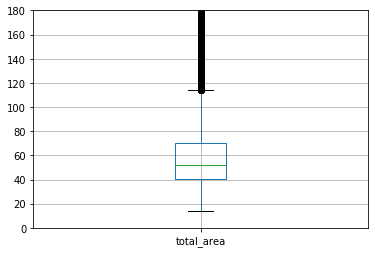

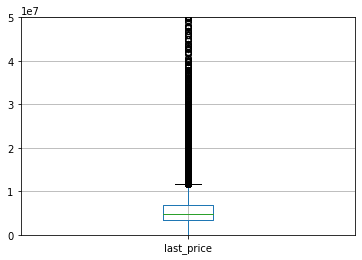

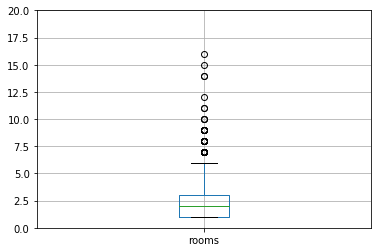

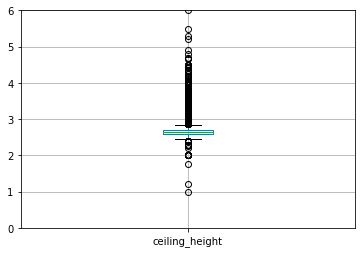

In [15]:
#построим диаграмму размаха для столбцов 'total_area, last_price, 'rooms', 'ceiling_height

#создаем словарь для наших столбцов с необходимыми условиями
    
dict_for_hist = {'total_area' : [(0, 180)],
                 'last_price' : [(0, 0.5e8)],
                 'rooms' : [(0, 20)],
                 'ceiling_height' : [(0, 6)]}

#цикл для построения диаграмм размаха
for column in dict_for_hist.keys():
    blocks.boxplot(column)
    plt.ylim(dict_for_hist[column][0])
    plt.show()

#### Вывод
1. По гистограмме площади: пик показателей приходится на значения, расположенные в отметке 56(м2); выбивающиеся значения есть по обе стороны графика: с левой стороны они начинаются на отметке 15(м2) и ниже - с правой стороны начинаются на отметке 115(м2);
2. По гистограмме цены: выбивающиеся значения сосредоточены в правой части графика и начинаются на отметке в 13 млн.р;
3. По гистограмме количества комнат: пик данных приходится на однокомнатные квартиры, дальше идут двухкомнатные, а потом трехкомнатные. Выбивающиеся значения начинаются после шестикомнатных квартир.
4. По гистограмме высоты потолка: пик данных приходится на квартиры с высотой потолка 2.6(м). Выбивающиеся значения есть по обе стороны графика: с левой стороны это все значения, равные или меньше 2.4(м), а с правой стороны все, что больше 2.9(м).

Дальше необходимо будет избавиться от выбивающихся значений во всех столбцах с учетом тех показателей, что были получены нами, так:
- в столбце 'total_area' убрать значения, что меньше 15(м2) и больше 115(м2);
- в столбце 'last_price' убрать значения, что больше 13 млн. рублей;
- в столбце 'rooms' убрать квартиры, где больше шести комнат;
- в столбце 'ceiling_height' убрать значения, что меньше 2.4(м) и больше 2.9(м).
Удаление этих выбивающихся значений поможет получить более объективную статистику.


---
## Комментарий от наставника

Процесс автоматизации построения графиков сделан верно. 

---

#### Время продажи квартир

count    21342.000000
mean        66.865383
std        359.859345
min       -666.000000
25%         21.000000
50%         77.500000
75%        204.000000
max       1580.000000
Name: days_exposition, dtype: float64

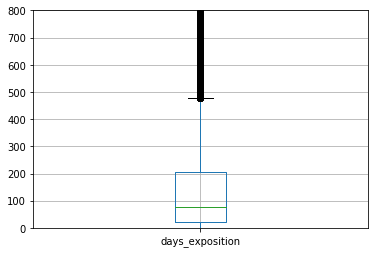

In [16]:
blocks['days_exposition'] != -666 #обратимся к нашему маркеру пропущенных значений

blocks.boxplot('days_exposition') #строю диаграмму размаха, подбирая различные ограничения по оси Y; останавливаюсь на 800)
plt.ylim(0, 800)

#использую метод describe для точности, а также получения среднего и медианы
blocks['days_exposition'].describe()

#### Вывод
Из графика и describe можно вывести следующее:
1. Среднее значение - 169 дней, медиана - 95 дней;
2. Основная масса значения расположена между первым и третьим квартилем - 45 и 200;
3. Значения, которые можно использовать в расчетах расположены в диапазоне от 45 до 470 дней;
4. Слишком быстрыми будем считать те случаи, когда квартира была продана менее, чем за 45 дней.
5. Слишком долгими будем считать те случаи, когда квартира была продана за более, чем 420 дней (эти выбивающиеся значения сливаются в единую жирную линию).

Нужно будет сделать срез, отбрасыващий выбивающиеся значения до 45 дней и после 470 дней.

---
## Комментарий от наставника

Здорово, что есть гипотезы о быстрых и долгих сделках.

---

#### Удаление редких и выбивающихся значений

In [17]:
#сделаем срез, в котором уберем все редкие и выдающиеся значения, и применим его к нашей таблице

blocks = blocks.query('15 <= total_area <= 115')
blocks = blocks.query('last_price <= 13000000')
blocks = blocks.query('rooms <= 6')
blocks = blocks.query('2.4 <= ceiling_height <= 2.9')
blocks = blocks.query('45 <= days_exposition <= 470')
blocks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10228 entries, 1 to 23695
Data columns (total 29 columns):
total_images            10228 non-null int64
last_price              10228 non-null int64
total_area              10228 non-null float64
first_day_exposition    10228 non-null datetime64[ns]
rooms                   10228 non-null int64
ceiling_height          10228 non-null float64
floors_total            10228 non-null int64
living_area             10228 non-null float64
floor                   10228 non-null int64
is_apartment            10228 non-null bool
studio                  10228 non-null bool
open_plan               10228 non-null bool
kitchen_area            10228 non-null float64
balcony                 10228 non-null int64
locality_name           10228 non-null object
airports_nearest        10228 non-null float64
cityCenters_nearest     10228 non-null float64
parks_around3000        10228 non-null int64
parks_nearest           10228 non-null float64
ponds_around300

#### Вывод
Для столбцов 'total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition' был применен метод среза данных df.query() с необходимыми показателями, чтобы отбросить редкие и выбивающиеся значения, мещающие объективному представлению данных. 

<font color=blue> Выбросы из данных удалены верно. 
    
---

---
## Комментарий от наставника

Исходя из чего выбраны именно такие границы для отсечения выбросов? Выбросы из данных следует удалять на основании диаграмм размаха. Построй для всех необходимых параметров график boxplot. По нему найди границы нормальных значения и удали выбросы. 

---

### Факторы, влияющие на стоимость квартиры

#### Определение зависимости цены квартиры от квадратного метра, числа комнат, удаленности от центра и других факторов

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.709446,0.425945,0.147804
total_area,0.709446,1.000000,0.798869,0.010383
rooms,0.425945,0.798869,1.000000,0.003064
cityCenters_nearest,0.147804,0.010383,0.003064,1.000000


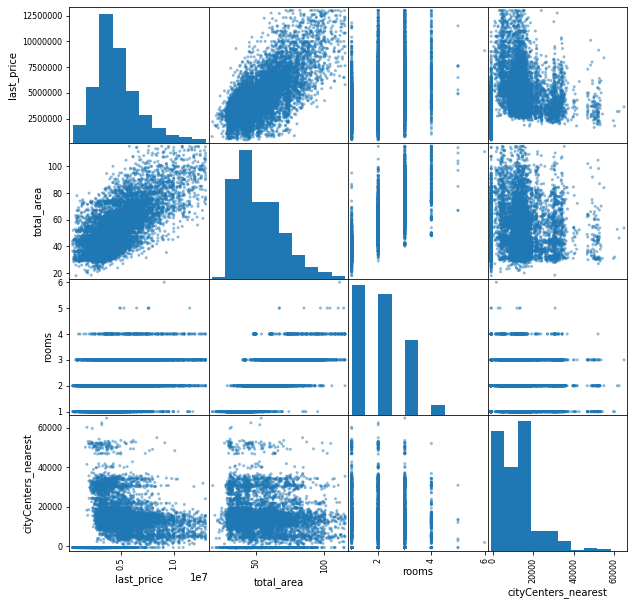

In [18]:
#определим зависимость цены квартиры от квадратного метра, числа комнат, удаленности от центра
#вспомним, что для столбца 'cityCenters_nearest' мы устанавливали специальный маркер, обозначающий те квартиры, что находятся очень далеко от центра. Самое время его применить.
blocks['cityCenters_nearest'] != -666

ltrc = blocks[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']] #переменная, где хранятся данные для выявления корреляции
pd.plotting.scatter_matrix(ltrc, figsize=(10, 10)) #получаем визуальное представление о корреляции
ltrc.corr() #получаем корреляцию в виде числовых данных (матрица корреляции)

#### Вывод
1. Зависимость между стоимостью квартиры и площадью квартиры определеленно есть. Об это свидетельствует сильно выраженная корреляция (0,7), следовательно, чем больше будет площадь квартиры, тем больше будет стоимость квартиры. Однако, у нас не 100% корреляция, так что, вероятно, на стоимость влияют и другие факторы;
2. Зависимость между стоимостью квартиры и количеством комнат оказалось выражена слабее, чем могло показаться при первом взгляде и составляет (0.4). Скорее всего дело в том, что комнат в квартире может быть много, а вот суммарная площадь квартиры с, например, четырьмя комнатами будет меньше, чем у квартиры с двумя комнатами;
3. Зависимость между стоимостью квартиры и удаленностью от центра имеет положительное значение. Выглядит странно. Такая корреляция свидетельствует о том, что, чем удаленнее квартира от центра, тем она дороже, но в действительно все наоборот. 

,last_price,floor_category_numbers
last_price,1.000000,0.176749
floor_category_numbers,0.176749,1.000000


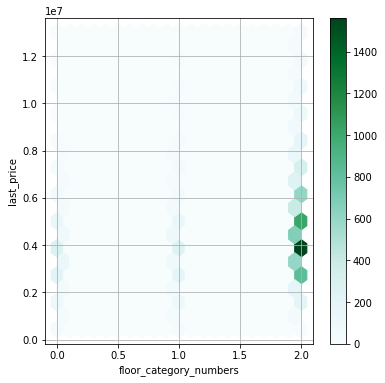

In [19]:
#определим зависимости цены квартиры от этажа, на котором она расположена

#для начала напишем фунцкию, которая заменит значения в столбце 'floor_category' на '0', '1', '2'

def numbers_floor(floor_category):
    if 'первый' in floor_category:
        return '0'
    if 'последний' in floor_category:
        return '1'
    return '2'

blocks['floor_category_numbers'] = blocks['floor_category'].apply(numbers_floor) #создаем новый столбец и в него помещаем категории, методом .apply примененным к столбцу 'floor_category'

blocks['floor_category_numbers'] = blocks['floor_category_numbers'].astype('int') #приведем значения в столбце к целочисленным

pcn = blocks[['last_price', 'floor_category_numbers']] #переменная, в которой хранятся необходимые столбцы для корреляции

pcn.plot(x='floor_category_numbers', y='last_price', kind='hexbin', gridsize=20, figsize=(6,6), sharex=False, grid=True) #строим график

pcn.corr() #числовое представление корреляции

#### Вывод
Зависимость между стоимостью квартиры и ее этажом выражена сильно лишь в том случае, если квартира не расположена ни на первом, ни на последнем этажах.
Так:
1. Если квартира расположена на первом и последнем этаже, то это не значит, что стоить она будет дороже; как раз наоборот.
2. Стоимость будет выше у тех квартир, что расположены в середине дома и это может быть обусловено множеством факторов.
(например: наличие лифта в доме - это играет важную роль для разных групп населения; на первым этажах может быть некомфортно жить из-за близости с улицей, детской площадкой, проезжей частью, парковкой и т.д; жители последних этажей могут страдать от затапливаемости крыши, если есть проблемы с обсулижванием дома).

,last_price,day_publication,month_publication,year_publication
last_price,1.000000,-0.009661,0.019581,0.007063
day_publication,-0.009661,1.000000,-0.001723,0.002948
month_publication,0.019581,-0.001723,1.000000,-0.160823
year_publication,0.007063,0.002948,-0.160823,1.000000


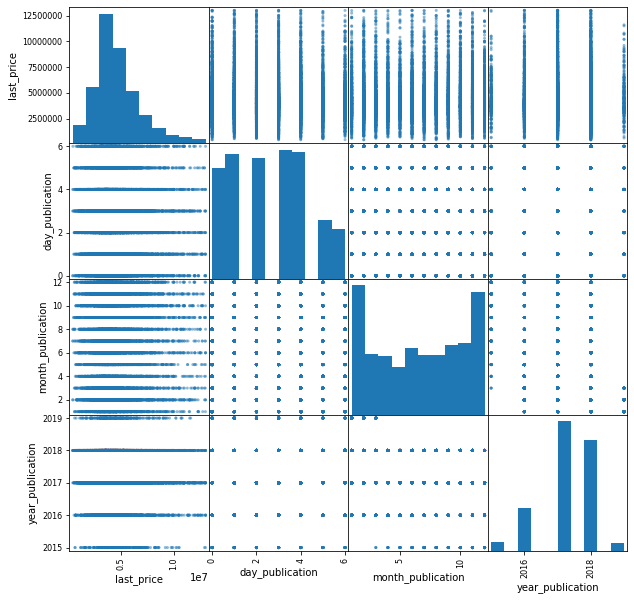

In [20]:
#определим зависимость цены квартиры от дня, месяца, года размещения
#построим матрицу рассеяния и выведем матрицу корреляции

dmy = blocks[['last_price', 'day_publication', 'month_publication', 'year_publication']] #переменная, где сохранены данные по столбцам
pd.plotting.scatter_matrix(dmy, figsize=(10,10)) #график матрицы рассеяния
dmy.corr() #вывод матрицы корреляции

#### Вывод
1. Зависимость между стоимостью квартиры и днем публикации объявления имеет отрицательный характер. Значит, если объявление было размещено в пятницу или выходные дни, то шансы, что на него сразу же обратят внимание - невелики - т.к в эти дни и люди, и организации, занимающиеся подбором недвижимости, не работают.
2. Зависимость между стоимостью квартиры и месяцем публикации объявления практически сведена к нулю. 
3. Зависимость между стоимостью квартиры и годом публикации объявления имеет слабовыраженный отрицательный характер. Возможную роль здесь играют, скорее всего, экономические особенности, как отдельно взятых индивидов, так и страны в целом.

---
## Комментарий от наставника

Основные параметры, влияющие на цену, изучены. Приведены необходимые графики и значения корреляций. Здорово, что по каждому параметру приведен вывод о его влиянии на цену квартиры. 

---

#### Топ-10 населенных пунктов по количеству объявлений

In [1]:
top10_locations = blocks['locality_name'].value_counts().head(10).index #создаем новую таблицу с топ 10 мест по количеству объявлений

city10 = blocks.query('locality_name in @top10_locations') #делаю отдельный массив со срезом основной таблицу по топ10 местам

#создаю сводную таблицу, для получения данных о средней цене квадратного метра в нашем массиве и сортирую по убыванию
city10.pivot_table(index = 'locality_name', values = 'price_per_meter', aggfunc= 'mean').sort_values(by = 'price_per_meter', ascending = False)

NameError: name 'blocks' is not defined

#### Вывод
Я создал отдельную таблицу и поместил в нее список топ10 локацией по количеству объявлений. Потом я сделал отдельный массив со срезом основной таблицы по нашему списку. Далее была построена сводная таблица по полученным данным, для вычисления средней цены за квадратный метр; таблица была отсортирована по убыванию для удобства.
Список 10 мест с наибольшим количеством объявлений выглядит так:
1. Санкт-Петербург;
2. Пушкин;
3. Деревня Кудрово;
4. Поселок Парголово;
5. Поселок Мурино;
6. Поселок Шушары;
7. Колпино;
8. Всеволожск;
9. Гатчина;
10. Выборг.

Самая высокая цена за квадратный метр в Санкт-Петербурге - 103570 т.р.
Самая низкая цена за квадратный метр в Выборге - 55941 т.р.

В принципе, данные по Питеру вполне ожидаемы, что еще подтверждает зависимость цены квартиры от удаленности от центра.

---
## Комментарий от наставника

Результат по ценам в зависимости от местоположения квартир верный, можно привести график зависимости цены от местоположения.

---

#### Данные по Санкт-Петербургу

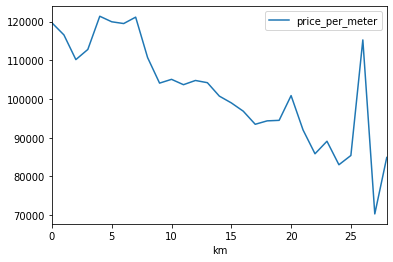

In [22]:
#вспомним, что для столбца 'cityCenters_nearest' мы устанавливали специальный маркер, обозначающий те квартиры, что находятся очень далеко от центра. Самое время его применить.
blocks['cityCenters_nearest'] != -666

#переведем метры в столбце 'cityCenters_nearest' в километры и запишем в отдельный столбец 'km'
blocks['km'] = (blocks['cityCenters_nearest'] / 1000).astype('int')

#сделаем срез таблицы по столбцу 'locality_name' для Санкт-Петербурга; сгруппируем по столбцу 'km' и посчитаем среднюю стоимость квадратного метра; построим график
blocks.query('locality_name == "санкт-петербург"').groupby(['km']).agg({'price_per_meter' : 'mean'}).plot()


Чтобы определить область, входящую в центр города было сделано следующее:
1. Вновь был применен булев массив с маркером, отбрасывающий ненужное значение в столбце 'cityCenters_nearest';
2. Создан новый столбец 'km', где хранится значечение расстояния до центра года в километрах и округленное до центра;
3. Сделан срез основной таблицы по столбцу 'cityCenters_nearest' для Санкт-петербурга. Этот срез был сгруппирован по столбцу 'km', была высчитана средняя стоимость квадратного метра для каждого километра и построен стандартный график.
На основании графика можно сделать вывод, что жилье находится в центре, если находится в диапазоне от 0 до 3км.
От 3 до 6км можно выделить следующую зону;
После шести километров график начинает упорядоченно угасать, проявляя небольшие вспышки после 25 км.

---
## Комментарий от наставника

Верный выбор центральной части города. 

---

#### Анализ квартир в центре города

#### Построение гистограмм и описание данных

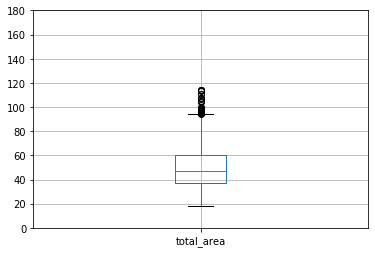

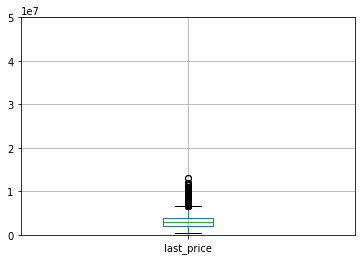

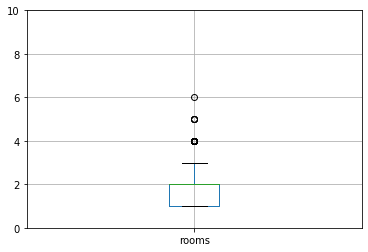

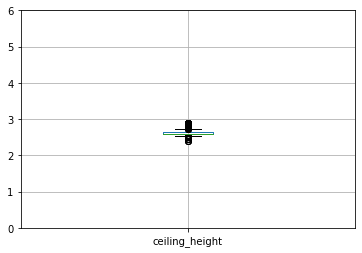

In [23]:
blocks = blocks.query('0 <= km <= 3') #обозначим срез для построения графиков по квартирам, находящимся только в центре

#создадим словарь для автоматизации процесса построения гистограмм по столбцам 'total_area', 'last_price', 'rooms', 'ceiling_height' для центра

dict_for_hist = {'total_area' : [(0, 180)],
                 'last_price' : [(0, 0.5e8)],
                 'rooms' : [(0, 10)],
                 'ceiling_height' : [(0, 6)]}

#цикл для построения диагрмм размаха
for column in dict_for_hist.keys():
    blocks.boxplot(column)
    plt.ylim(dict_for_hist[column][0])
    plt.show()

Построив гистограммы можно сделать следующие выводы:
1. По гистограмме для площади: пик графика приходится на квартиры с площадью 50(м2). Основная площадь у квартир варьируется от 30(м2) до 60(м2). Выбивающиеся значения начинаются после 90м(2)
2. По гистограмме для цены: редкие значения начинаются после 10 млн.рублей, продолжаются до 15 млн. рублей и пропадают;
3. По гистограмме количества комнат: больше всего в центре двухкомнатных квартир, потом идут однакомнатные, трехкомнатные и т.д по убывающей; выбивающиеся значения начинаются с четырехкомнатных квартир. Основной диапазон от однокомнатных до трехкомнатных квартир. 
4. По гистограмме высота потолка: пик данных приходится на квартиры с высотой потолка 2.7 - 2.8(м); выбивающиеся значения расположены с правой стороны графика, те, где высота потолка больше 2.9(м)




---
## Комментарий от наставника

Здорово, что и этот процесс автоматизирован. Также радует, что присутствует анализ полученных значений. 

---

#### Факторы, влияющие на стоимость квартиры в центре

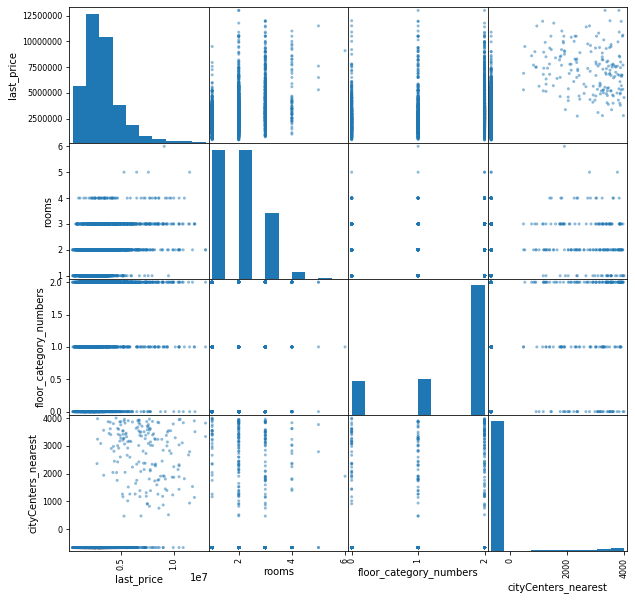

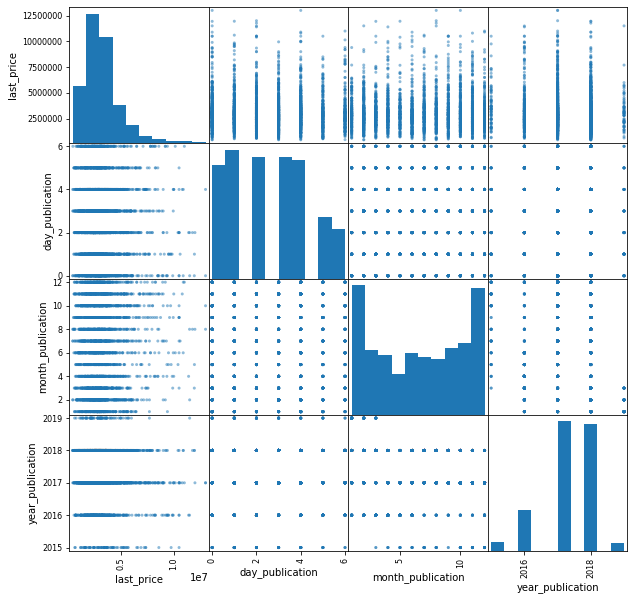

In [24]:
#вновь обратимся к нашему булеву массиву для столбца 'cityCenters_nearest'
blocks['cityCenters_nearest'] != -666

#графики для центра и остальной части выведем в одном блоке
ltrc = blocks[['last_price', 'rooms', 'floor_category_numbers', 'cityCenters_nearest']] #переменная, где хранятся данные для выявления корреляции
pd.plotting.scatter_matrix(ltrc, figsize=(10, 10)) #получаем визуальное представление о корреляции
plt.show()
dmy_spb = blocks[['last_price', 'day_publication', 'month_publication', 'year_publication']] #переменная, где сохранены данные по столбцам
pd.plotting.scatter_matrix(dmy_spb, figsize=(10,10)) #график матрицы рассеяния
plt.show()
#ltrc.corr() #получаем корреляцию в виде числовых данных (матрица корреляции)
#dmy_spb.corr() #матрица корреляции для дня, месяца, года


#### Вывод
1. Зависимость между стоимостью квартиры и количеством комнат выражена слабо (0.36). Можно предположить, что есть такие однокомнатные квартиры, расположенные ближе всего к центру города (менее 1км) и они стоят дороже, чем трехкомнатные, но в диапазоне между (2-3км);
2. Зависимость между стоимостью квартиры и ее этажом выражена сильно только в тех случаях, если квартира расположена не на первом и последнем этажах. Это также может быть обусловлено теми же факторами, чтобы были описаны, когда выясняли общую зависимость между стоимостью квартиры и этажом;
3. Зависимость между стоимостью квартиры и приближенностью к центру выражена сильно (0.56). Чем ближе квартира будет расположена к центру города, тем выше будет ее стоимость.
4. Зависимость между стоимость квартиры и датой публикации объявления выражена по разному: в случаем с днем и годом публикации у нас отрицательные зависимости (-0.014) и (-0.044), а с месяцем корреляция положительная. Но они настолько малы, что вывести, что-нибудь определенное очень сложно. 

#### Сравнение с общими выводами по городу
1. Зависимость между стоимостью и количеством комнат выражена по-разному. Так, если в общих данных корреляция (0.7), то в данных по центру (0.36). Это может быть связано с тем, что вне центра - площадь квартиры играет гораздо большую роль в ценообразовании квартиры, чем в центре. Как я уже написал, в центре может быть однокомнатная квартира (расположенная прям в самом центре), а может быть трехкомнатная, но расположенная чуть подальше и стоить дешевле. Тут нужно учитывать различные факторы, как: тип дома, благоустройство, наличие ремонта в квартире, инфрастуктуры и т.д. Также нужно учитывать суммарную площадь квартиры и планировку. 
2. Зависимость между стоимостью и этажом выражена так же, как и в случае с общими данными по городу. Зависимость есть только тогда, когда квартира не расположена на первом и последнем этажах;
3. Зависимость между стоимостью и удаленностью от центра выражена практически одинаково. И там, и там зависимость приближена к (0.5);
4. Зависимость между датой публикации в обоих случая выражены практически идентично. И там, и там зависимость практически не выражена. 

---
## Комментарий от наставника

Будет здорово, если ты построишь параметры для центра и для остальной части города на одном рисунке. Так различия в данных будет легче обнаружить. 

Характерные для центра черты обнаружены. 

---

### Вывод
Это был самый продолжительный этап проекта.
#### Итак, что получилось:
1. Были использованы словари для автоматизации построения диаграмм размаха, что выполнить задание более аккуратно и сократить время;
2. Были проанализированы данные по площади, цене, количеству комнату и высоте потолков во всей нашей таблице, после чего определены выбивающиеся значения.
3. Был построен график для времени продажи квартир, определены среднее значение, медиана, а также редкие и выбивающиеся значения. Слишком быстрыми случаями продажи принято считать те, когда кватира была продана за менее, чем 45 дней, а слишком долгими те, когда была продана за более, чем 470 дней;
4. К столбцам 'total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition' был применен метод среза данных с необходимыми критериями: ('15 <= total_area <= 115'), ('last_price <= 13000000'), ('rooms <= 6'), ('2.4 <= ceiling_height <= 9'), ('45 <= days_exposition <= 570');
5. Были выявлены зависимости стоимости квартиры между различными факторами: площадью квартиры, количеством комнат, удаленностью от центра. Между стоимсть и площадью есть сильная корреляции (0.7), что ожидаемо. Между стоимостью и количеством комнат корреляция есть, но выражена не так сильно. Между стоимостью и удаленностью от центра отрицательная зависимость;
6. Зависимость между стоимостью и этажом выражена сильно только в тех случаях, если квартира не расположена на первом и последнем этажах, что обусловлено различными факторами;
7. Стоимость квартиры между датой публикации объявления выражена очень слабо во всех трех случаях, что может свидетельствовать о том, что это не ключевой фактор в ценообразовании и стоит учитывать лишь отдельные, более глобальные факторы, например, экономическую ситуацию в стране и в мире;
8. Была создана отдельная таблица с топ10 мест по количеству объявлений. По полученным данным была построена сводная таблица, с помощью которой произведены вычисления средней цены за квадртная метра для каждого из топ 10 наименований. Самая высокая стоимость, что вполне ожидаемо, оказалась в Санкт-Петербурге - 103570 т.р, а самая низкая в Выборге - 55941 т.р;
9. Для определения области, находящейся в центре города было сделано следующее: применен булев массив, отбрасывающий значения отмеченные специальным маркером '-666' в столбце 'cityCenters_nearest'; создан новый столбец 'km', где хранятся данные по расстоянию до центра; посчитана средняя стоимость квадратного метра для каждого километра и выведен стандартный график,благодаря которому мы смогли понять область, находящуюся в самом центре города - от 0 до 3 км;
10. Для квартир, находящихся в центре были получены и описаны следующие данные: площадь, цена, количество комнат и высота потолка. Построен график для каждой из величин;
11. Для квартир в центре были определены зависимости между стоимостью и: количеством комнат (0.36), этажом, приблеженностью к центру (0.56), датой публикации. Наличие зависимости межлу количеством комнат выражена средне, т.к в центре есть однокомнатные квартиры, что будут стоить дороже тех же трехкомнатных, находящихся чуть подальше от центра. Зависимость между этажом выражена слабо. Между приближенностью к центру выражена сильно, т.к чем ближе к центру квартира, тем она дороже. Между стоимостью и датой публикации были выявленые отрицательные, пусть и слабые зависимости. Это может свидетельствовать лишь о том, что в некоторых годах цена на квартиры была ниже или выше.
12. Было произведено сравнение между данными по центру и общими данными. В целом можно сказать, что в некоторых аспектах зависимость или совпадает, или выражена по-разному. Так, между стоимостью и количеством комнат центре и в общих данных зависимость различается - 0.36 и 0.7 - это может служить доказательством того, что в в самом центре однокомнантная квартира может стоить дороже трехкомнатной, если трехкомнтная расположена чуть дальше от центра, а также о том, что удаленность от центра все же влияет на стоимость. А вот между этажом и датой публикации зависимости практически идентичны. 

### Шаг 5. Общий вывод

Задачей проекта было установить параметры выборки.

В процессе работы было сделано следующее: получено общее представление о данных; определены и обработаны все пропущенные значения; изменены типы данных в столбцах, где это было необходимо; определено отсутствие дубликатов; произведена категоризация данных в столбцах; посчитаны и добавлены в таблицу необходимые данные; изучены параметры площади, цены, числа комнат и высоты потолков, как для общих данных, так и только для центра Санкт-Петербурга; для каждого из параметров были построены гистограммы, определены и убраны выбивающиеся значения; была выяснена зависимость между стоимостью квартиры и другими факторами, как для общих данных, так и для центра Санкт-Петербурга; произведено сравнение этих показателей и написаны выводы.

Для массива данных были установлены следующие параметры:
('15 <= total_area <= 115') - площадь квартиры больше или равна 25(м2) и меньше или равно 180(м2). Такая выборка позволила отбросить редкие и выбивающиеся значения, что существенно сказалось на объективность представляемых данных;
('last_price <= 13000000') - стоимость квартиры больше 45 млн.рублей; Основная масса цен находилась в диапазоне от 0 до 45 млн. рублей, что позволило проанализировать и отбросить редкие значения;
('rooms <= 6') - количество комнат больше или равно 7. Основная масса комнат сосредоточена в диапазоне от 1 до трех, дальше начиналось плавное угасание, а после 7 количество комнат вовсе сходило на нет. 
('2.4 <= ceiling_height <= 2.9') - высота потолка больше или равна 2.4м и меньше или равно 4м. Эта выборка опять-таки помогла избавиться от совсем космических высот потолка и отбросить квартиры со слишком маленькой высотой;
('45 <= days_exposition <= 470') - количество дней на размещении больше или равно 45 и меньше или равно 500. Было установлено, что объявления, реализующиеся менее, чем за 45 дней являются слишком быстрыми, а те, что реализуются больше 500 дней слишком долгими.

Было также определено, что больше всего на стоимость квартиры влияют следующие факторы: площадь квартиры, количество комнат в квартире, удаленность от центра.
#### Так:
1. между стоимостью квартиры и площадью корреляция составляет почти 0.7, что свидетельствуют о сильной зависимости. Чем больше площадь квартиры, тем выше цена на нее;
2. между стоимостью и количеством комнат корреляция есть, но она выражена не так сильно. Однако, отрицать ее не стоит. 
2. между стоимостью и удаленностью от центра выявлена отрицательная квартира, что свидетельствует о том, что по мере удаления от центра города стоимость на квартиру будет снижаться.

##### Самая высокая цена за квадратный метр в Санкт-Петербурге - 103570 т.р;
##### Самая низкая цена за квадратный метр в Выборге - 55941 т.р;

Можно сделать вывод, что цена квартир в центре будет отличаться в большую сторону от цен квартир не в центре города или в окрестностях.

##### Центром города была определена область от 0 до 3 км.

##### Факторы, влияющие на стоимость квартиры в центре Санкт-Петербурга и в других областях имеют разные аспекты, так:
1. Зависимость цены от количества комнат выражена по-разному. В центре она составляет (0.36), а в других областях (0.7). Это может свидететельствовать о разбросе цен в пределах нашей центральной зоны. Так, однокомнатная квартира на расстоянии от 0км до 1км от центра города может стоить дороже, чем трехкомнатная квартира на расстоянии от 2 до 3км. Тут нужно учитывать высокую себестоимость метра в центре города, а также другие факторы, как то: благоустройство, тип дома, инфраструктура, площадь квартиры, планировка и т.д;
2. Зависимость между стоимость и удаленность от центра выражена по-разному. В общем массиве данных она - слабое отрицательное значение, в данных по центру Санкт-Петербурга приобрефает вид сильной положительной зависимости, свидетельствующей о том, что, чем ближе квартира к центру города, что уже было сказано, тем выше будет ее стоимость;

##### В случаях с зависимостью стоимости от этажа и даты публикации объявления, зависимость выражена слабо.

##### По итогу можно сказать, что были проведены все необходимые операции и даны ответы на все поставленные задачи. 

---
## Комментарий от наставника

Выводы описаны грамотно. Приведены ответы на главные вопросы проекта. В выводах можно приводить полученные ранее значения, правильно. Здорово, что по каждому пункту работы приведен вывод. 

---

<font color=blue> Помарки исправлены, и теперь работа выполнена хорошо. Успехов в дальнейших проектах :)
    
---

## Комментарий от наставника

- Попробуй улучшить обработку пропусков в соответствии с замечаниями;
- Удаляй выбросы на основании boxplot.

Если тебе нравится тема визуализации, то можешь изучить методы библиотеки seaborn. Она позволяет строить довольно презентабельные графики.

Ты проделал большую работу, молодец! Работа выполнена хорошо. Осталось устранить некоторые помарки. Исправь отмеченные тут замечания, и получится очень достойная работа :)

-----

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод